# Importe

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import statsmodels.api as sm
from uncertainties import ufloat, unumpy as unp
# from lmfit.models import StepModel, LinearModel
import sympy as sym
from scipy.stats import chisquare
from scipy.stats import gaussian_kde


plt.style.use('classic')
plt.rc('text',usetex=True) 
# plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen

ModuleNotFoundError: No module named 'lmfit'

# Selbstdefinierte Funktionen

In [133]:
pi = 3.1415
# lineare Regression
def reg(x,a,b):
    regg = a * x + b
    return regg

def reg2(x,a,b):   
    regg = 1/(a*x+b)
    return regg

def reg3(x,a,b,c):
    regg = (a**2 + (2*pi*b*x - 1/(2 * pi * c* x)) ** 2)**0.5
    return regg
# U_ss in U_s umrechnen
def us(x):
    f = x/(2)
    return f

# Gleichung (21), Versuchsskript
def Z_1(U1,U2,R):            
    k = R * (U1-U2)/U2
    return k

def Z_2(x,a,b):
    k = np.sqrt((x*a)**2 + b**2)
    return k

# Chi^2
def chi_square(y,f_y,y_err):
    # Arrays-artige einfügen
    chi = (y-f_y)**2/y_err**2
    chi_2 = chi.sum()
    return chi_2

def chi_red(chi,f):
    # f: Freiheitsgrade
    # chi: chi^2
    c = chi-v
    return c

# Daten laden

In [134]:
A1_df = pd.read_csv('A1.txt',sep='\t')
A3_df = pd.read_csv('A3_Eigene_Werte.txt',sep='\t')
A5_df = pd.read_csv('A5_Eigene_Werte.txt',sep='\t')
A2_df = pd.read_csv('A2.txt',sep='\t')
A9_df = pd.read_csv('A9.txt',sep='\t')
A10_df = pd.read_csv('A10.txt',sep='\t')
A12_df = pd.read_csv('A12.txt',sep='\t')

In [7]:
# Test
A1_df.head()

,Signal,Frequenz(Hz),U_ss,U_eff
0,sinus,1422.0,22.0,NaN
1,sinus,538.5,23.0,NaN
2,Dreieck,16596.0,23.0,NaN
3,Rechteck,16597.0,23.0,NaN
4,sinus,1430.0,NaN,7.42


# Aufgabe 1

In [8]:
# Daten:
A1_df.head()

,Signal,Frequenz(Hz),U_ss,U_eff
0,sinus,1422.0,22.0,NaN
1,sinus,538.5,23.0,NaN
2,Dreieck,16596.0,23.0,NaN
3,Rechteck,16597.0,23.0,NaN
4,sinus,1430.0,NaN,7.42


In [9]:
Signal= A1_df['Signal']
A1_Osz1 = pd.Series(A1_df['Frequenz(Hz)'][0:4])
#print(A1_Osz1)
A1_Osz2 = pd.Series(A1_df['U_ss'][0:4])
#print(A1_Osz2)
print(Signal[0:4])
A1_Osz = pd.DataFrame({'Freq': list(A1_Osz1), 
                       'U_ss':list(A1_Osz2)},
                      index=['sinus','sinus','Dreieck','Rechteck'])#
print('\n','Oszillator','\n',A1_Osz)

A1_Mul = pd.DataFrame({'Freq': list(A1_df['Frequenz(Hz)'][4:8]),
                     'U_eff':list(A1_df['U_eff'][4:8])},
                    index=['sinus','sinus','Dreieck','Rechteck'])
print('\n','Multimeter\n',A1_Mul)

0       sinus
1       sinus
2     Dreieck
3    Rechteck
Name: Signal, dtype: object

 Oszillator 
              Freq  U_ss
sinus      1422.0  22.0
sinus       538.5  23.0
Dreieck   16596.0  23.0
Rechteck  16597.0  23.0

 Multimeter
             Freq   U_eff
sinus     1430.0   7.420
sinus      540.0   7.940
Dreieck   1660.0   6.465
Rechteck  1660.0  11.769


In [12]:
U_s = us(A1_Osz['U_ss'])
faktor= [1/np.sqrt(2),1/np.sqrt(2),1/np.sqrt(3),1]
U_eff = U_s * faktor
print(U_eff)
print('\n')
print(A1_Mul['U_eff'])
print('\n')
diff = A1_Mul['U_eff']-U_eff
print(diff)

sinus        7.778175
sinus        8.131728
Dreieck      6.639528
Rechteck    11.500000
Name: U_ss, dtype: float64


sinus        7.420
sinus        7.940
Dreieck      6.465
Rechteck    11.769
Name: U_eff, dtype: float64


sinus      -0.358175
sinus      -0.191728
Dreieck    -0.174528
Rechteck    0.269000
dtype: float64


# Aufgabe 2

In [13]:
# Kapazität Aufgabe 2
C_A_2 = 98.5e-9 
err_c = 98.5e-9 * 0.3
print(f"Kapazität: {C_A_2}+-{err_c}")

# Ohmscher Widerstand Spule
R_L = 149.90
err_R_L = 149.90 * 0.8 /100 
print(f"Ohmscher Widerstand Spule: {R_L}+-{round(err_R_L,1)}")

Kapazität: 9.85e-08+-2.955e-08
Ohmscher Widerstand Spule: 149.9+-1.2


Aufrunden auf die siebte Nachkommastelle

In [14]:
print(round(98.5e-9,7))
print(round(err_c,7))

1e-07
0.0


# Aufgabe 3/4

## Datenladen und Ploten

In [15]:
A3_df

,Nr,Frequenz,U_ss_K1,U_ss_K2
0,1,1053,14,14.00
1,2,1884,14,13.80
2,3,3010,14,14.00
3,4,3974,14,14.25
4,5,5152,14,14.05
5,6,5855,14,14.00


In [16]:
U_2 = np.array(A3_df['U_ss_K1'])
U_1 = np.array(A3_df['U_ss_K2'])
f = np.array(A3_df['Frequenz'])
R_p = 10e3*np.ones(6)

In [17]:
print(R_p)

[10000. 10000. 10000. 10000. 10000. 10000.]


In [18]:
print(len(U_2))
print(len(U_1))
print(len(R_p))

6
6
6


In [19]:
Z = Z_1(U_1,U_2,R_p)
Z

array([   0.        , -142.85714286,    0.        ,  178.57142857,
         35.71428571,    0.        ])

In [20]:
Zz = Z_1(U_1,U_2,R_p/1e3)
Zz

array([ 0.        , -0.14285714,  0.        ,  0.17857143,  0.03571429,
        0.        ])

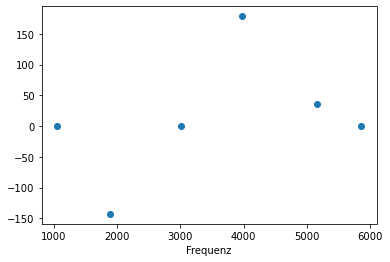

In [21]:
plt.plot(f,Z,'o')
plt.xlabel(r'Frequenz')
plt.show()

In [22]:
xa3 = np.ones(6)
for i in range(6):
    xa3[i] = float(f[i])


ya3 = Z
print(f) 
print(ya3)

[1053 1884 3010 3974 5152 5855]
[   0.         -142.85714286    0.          178.57142857   35.71428571
    0.        ]


In [23]:
pop,cov = curve_fit(Z_2,xa3,ya3)
a3,b3 = pop
# da3,db3 = np.diagonal(np.sqrt(cov))

print(a3)
print(b3)

0.006913143590865492
0.0003718132502354767


C:\Users\Ben Fliegener\Miniconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [24]:
pop, cov = curve_fit(reg2,xa3,ya3)
a3_2,b3_2= pop

In [25]:
x_plot = np.arange(0,10e2,100)
# print(x_plot)
y_plot = Z_2(x_plot,a3,b3)
y_plot_2 = reg2(x_plot,a3_2,b3_2)
#print(y_plot_2)

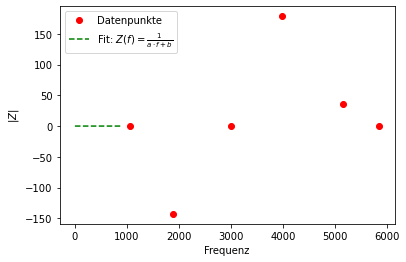

In [26]:
plt.plot(f,Z,'ro',label='Datenpunkte')
#plt.plot(x_plot,y_plot,'b--',label='Fitkurve')
plt.plot(x_plot,y_plot_2,'--',color='green',label=r'Fit: $Z(f) = \frac{1}{a\cdot f +b}$')
plt.xlabel(r'Frequenz')
plt.ylabel(r'$|Z|$')
plt.legend()
plt.show()

## Test

In [27]:
f_test = np.arange(-6000, 6000, 600)
Z_test= np.sqrt(10e3**2 + (1/(2*np.pi*C_A_2*f_test))**2)

C:\Users\Ben Fliegener\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [28]:
print(r"a^{2}")

a^{2}


$|Z|=\sqrt{R_{p}^{2}+ \left(\frac{1}{2 \pi C f_{test}}\right)^{2}}$ 



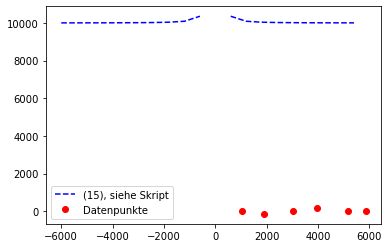

In [29]:
# Funktion: 
print(r'$|Z|=\sqrt{R_{p}^{2}+ \left(\frac{1}{2 \pi C f_{test}}\right)^{2}}$','\n')
plt.plot(f_test,Z_test,'b--',label='(15), siehe Skript')
# 
plt.plot(f,Z,'ro',label='Datenpunkte')
plt.legend()
plt.show()

## Simulierte Daten von Kacper mit unseren Gemessenen Daten:

In [30]:
f_sim = np.array([1.05, 1.88, 3.01,3.97, 5.15, 5.86])*1000
U1_sim = np.array([13.92,13.92,13.91,13.91,13.91,13.92])
U2_sim = np.array([13.45,13.73, 13.83, 13.87, 13.88,13.89])
# print(len(U1_sim))
# print(len(U2_sim))
# print(1/U2_sim**2)
Umkehr_U2_sim = 2/U2_sim

In [31]:
Z_sim = Z_1(U1_sim,U2_sim,R_p)
Z_sim

array([349.44237918, 138.38310269,  57.84526392,  28.83922134,
        21.61383285,  21.59827214])

### Fehlerberechnung

In [35]:
# |z| Fehler berechnen

u_U_sim= 0.0025 * np.ones(6) 
# print(U_sim_err)

u_R_p = R_p * 0.01  # 4 Ziffern, siehe Blatt <<Technische Daten>>
print(u_R_p)
# print(R_p)

u_Z_sim = np.sqrt((U1_sim/U2_sim-1)**2 * u_R_p**2 
                  + R_p**2 * u_U_sim**2 * (U1_sim**2 / U2_sim**2  
                                           + ( U1_sim /U2_sim-Umkehr_U2_sim)**2))
print(u_Z_sim)

[100. 100. 100. 100. 100. 100.]
[34.24249916 33.39774061 33.10734443 33.00808611 32.98375428 32.98538518]


In [36]:
u_U = 0.05 * 5 * np.ones(6)
# print(U_1)
# print(U_2)
# print(Z)
u_z = np.sqrt((U_1/U_2-1)**2 * u_R_p**2 
                  + R_p**2 * u_U**2 * (U_1**2 / U_2**2  
                                           + ( U_1 /U_2-2/U_2)**2))
print(u_z)

[3292.69444903 3242.33822154 3292.69444903 3355.64698817 3305.28432427
 3292.69444903]


### Regression

In [37]:
# Simulierte Daten
pop,cov = curve_fit(reg2,Z_sim,f_sim,sigma=u_Z_sim)
a_sim,b_sim = pop
da_sim,db_sim=np.sqrt(np.diag(cov))
print(f'a = {ufloat(a_sim,da_sim)}')
print(f'b = {ufloat(b_sim,db_sim)}')

a = (3.7+/-1.0)e-06
b = 0.000111+/-0.000028


In [38]:
print(len(u_z))
print(len(f))
print(u_z) 
print(Z)
print(f)

6
6
[3292.69444903 3242.33822154 3292.69444903 3355.64698817 3305.28432427
 3292.69444903]
[   0.         -142.85714286    0.          178.57142857   35.71428571
    0.        ]
[1053 1884 3010 3974 5152 5855]


In [39]:
# Gemessene Daten:
pop,cov = curve_fit(reg2,Z,f,sigma=u_z)#
a_mes,b_mes = pop
da_mes,db_mes=np.sqrt(np.diag(cov))
print(cov)
print(f'a = {ufloat(a_mes,da_mes)}')
print(f'b = {ufloat(b_mes,db_mes)}')

[[inf inf]
 [inf inf]]
a = -58003.40613606437+/-inf
b = 0.0003024803387361109+/-inf


C:\Users\Ben Fliegener\Miniconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


#### Logarithmisierung

In [40]:
Z22 = Z
for i in range(len(Z)):
    if Z22[i] ==0:
        Z22[i] = 1e-15
print(Z22)

[ 1.00000000e-15 -1.42857143e+02  1.00000000e-15  1.78571429e+02
  3.57142857e+01  1.00000000e-15]


In [41]:
# logarithmisierung
Z_log = np.log(abs(Z22))
f_log = np.log(f)
u_z_log = np.log(u_z)
print(Z)
print(f)
print(u_z)
print(Z_log)

[ 1.00000000e-15 -1.42857143e+02  1.00000000e-15  1.78571429e+02
  3.57142857e+01  1.00000000e-15]
[1053 1884 3010 3974 5152 5855]
[3292.69444903 3242.33822154 3292.69444903 3355.64698817 3305.28432427
 3292.69444903]
[-34.53877639   4.96184513 -34.53877639   5.18498868   3.57555077
 -34.53877639]


In [42]:
pop,cov = curve_fit(reg,Z_log,f_log,sigma=u_z_log)#
a_mes_log,b_mes_log = pop
da_mes_log,db_mes_log=np.sqrt(np.diag(cov))
print(cov)
print(f'a = {ufloat(a_mes_log,da_mes_log)}')
print(f'b = {ufloat(b_mes_log,db_mes_log)}')

[[0.00022322 0.00334572]
 [0.00334572 0.13557494]]
a = 0.006+/-0.015
b = 8.1+/-0.4


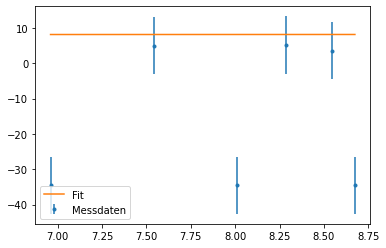

In [43]:
plt.errorbar(f_log,Z_log,fmt='.',yerr=u_z_log,label='Messdaten')
plt.plot(f_log,reg(f_log,a_mes_log,b_mes_log),label='Fit')
plt.legend()
plt.show()

$\textbf{Interpretation}$:  
Das b aus der Regression können wir ignorieren, das es sehr nah an 0 liegt.

### $\chi^2$

In [44]:
# Simulierte Daten
chi_sim = chi_square(Z_sim,reg2(f_sim,a_sim,b_sim),u_Z_sim)
chi_sim
print(f'das chi Quadrat ist: {round(chi_sim,2)}')
print(f'das reduzierte chi Quadrat ist: {round(chi_sim-2,2)}')

das chi Quadrat ist: 11.77
das reduzierte chi Quadrat ist: 9.77


$\textbf{Interpretation}$:  
Die Ablesefehler sind zu klein gewählt worden.

In [45]:
# Gemessene Daten:
chi_mes = round(chi_square(Z,reg2(f,a_mes,b_mes),u_z),2)
print(fr'$chi^2$: {chi_mes}')
print(r'reduziertes $chi^2_{\mu}$:',f'{round(chi_mes-2,2)}')

$chi^2$: 0.0
reduziertes $chi^2_{\mu}$: -2.0


$\textbf{Interpretation}$:  
Die Ablesefehler sind zu groß abgeschätzt worden. 

### $R^2$

In [46]:
# mit from sklearn.metrics import r2_score für simulierte Daten:
r_quad_sim = r2_score(Z_sim, reg2(f_sim,a_sim,b_sim))
print(r'$R^2$ für die Simulierten Daten')
print(r_quad_sim)

# mit from sklearn.metrics import r2_score für gemessene Daten:
r_quad_mes = r2_score(Z, reg2(f,a_mes,b_mes))
print()
print(r'$R^2$ für die gemessenen Daten')
print(r_quad_mes)

$R^2$ für die Simulierten Daten
0.8370570317991064

$R^2$ für die gemessenen Daten
-0.016129032242395036


In [47]:
# mit Statsmodels für simulierte Daten
y=Z_sim
x_zunahme=sm.add_constant(f_sim)
results_sim=sm.OLS(y,x_zunahme).fit()#,sigma=yerr
print('''
Lineare Regression
''')
print(results_sim.summary())


Lineare Regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     9.135
Date:                Mon, 06 Dec 2021   Prob (F-statistic):             0.0391
Time:                        20:20:29   Log-Likelihood:                -33.543
No. Observations:                   6   AIC:                             71.09
Df Residuals:                       4   BIC:                             70.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        303.6265     73.88

C:\Users\Ben Fliegener\Miniconda3\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [48]:
# mit Statsmodels für simulierte Daten
y=Z
x_zunahme=sm.add_constant(f)
results_mes=sm.OLS(y,x_zunahme).fit()#,sigma=u_z
print('''
Lineare Regression
''')
print(results_mes.summary())


Lineare Regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.7289
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.441
Time:                        20:20:30   Log-Likelihood:                -35.254
No. Observations:                   6   AIC:                             74.51
Df Residuals:                       4   BIC:                             74.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -63.6070     98.39

C:\Users\Ben Fliegener\Miniconda3\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


### Plot

In [49]:
ff_sim = np.arange(800,6000,100)
Zz_sim = reg2(ff_sim,a_sim,b_sim)
Zz = reg2(ff_sim,a_mes,b_mes)

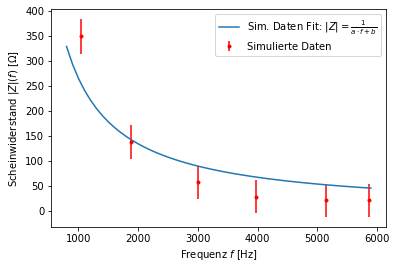

In [50]:
plt.errorbar(f_sim,Z_sim,yerr=u_Z_sim,fmt='.',color='red',label='Simulierte Daten')

plt.plot(ff_sim,Zz_sim,label=r'Sim. Daten Fit: $|Z| = \frac{1}{a\cdot f + b}$')
plt.xlabel(r'Frequenz $f$ [Hz]')
plt.ylabel(r'Scheinwiderstand $|Z|(f)$ [$\Omega$]')
plt.legend()
plt.show()

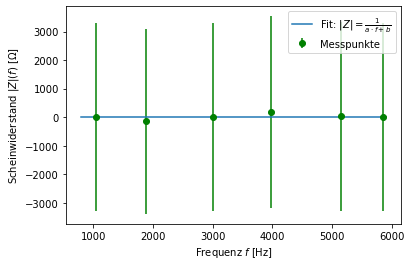

In [51]:
plt.errorbar(f, Z,yerr=u_z, fmt='o',color='g', label='Messpunkte')
plt.plot(ff_sim,Zz,label=r'Fit: $|Z| = \frac{1}{a\cdot f + b}$')
plt.xlabel(r'Frequenz $f$ [Hz]')
plt.ylabel(r'Scheinwiderstand $|Z|(f)$ [$\Omega$]')
plt.legend()
plt.show()

### Residuen

In [52]:
# für simulierte Daten:
influence_sim = results_sim.get_influence()

# standardisierte Residuen erhalten
standardized_residuals_sim = influence_sim.resid_studentized_internal

# standardisierte Residuen anzeigen
print(standardized_residuals_sim)

[ 1.90873247 -0.86831844 -1.00899586 -0.644083    0.22081343  0.9751549 ]


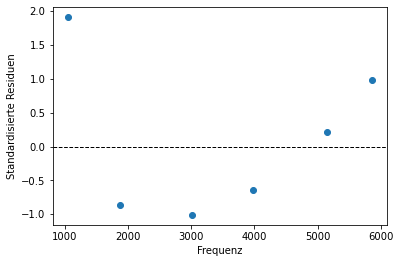

In [53]:
plt.plot(f_sim, standardized_residuals_sim,'o')
plt.xlabel('Frequenz')
plt.ylabel('Standardisierte Residuen')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

In [54]:
# für gemessene Daten:
influence_mes = results_mes.get_influence()

# standardisierte Residuen erhalten
standardized_residuals_mes = influence_mes.resid_studentized_internal

# standardisierte Residuen anzeigen
print(standardized_residuals_mes)

[ 0.55139077 -1.37364392 -0.01627789  1.63337358 -0.14094438 -0.83729543]


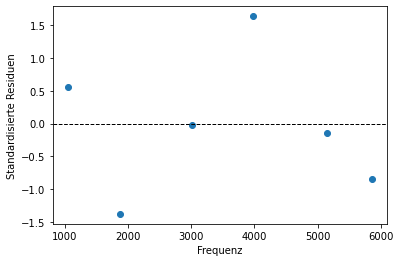

In [55]:
plt.plot(f_sim, standardized_residuals_mes,'o')
plt.xlabel('Frequenz')
plt.ylabel('Standardisierte Residuen')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

## Berechnung von C aus Regression:  
Das b in der Regressionsformal ignorieren wir. Begründung steht weiter in der Interpretation der Regressionsparameter
$$ |Z| = \frac{1}{a\cdot f} \\ |Z| = \frac{1}{2 \cdot \pi\cdot f\cdot C} \\ \Rightarrow C = \frac{a}{2\pi}$$

In [56]:
# für die simulierten Daten:
C_sim = a_sim/(2*np.pi)
C_mes = a_mes/(2* np.pi)
print(C_sim)
print(C_mes)

5.820902507403893e-07
-9231.528802721417


In [57]:
# mit Fehler:


# Aufgabe 5/6

In [58]:
A5_df.head()

,Nr,Frequenz,U_2,U_1,T_1/2(ms),t_D(ms)
0,1,31.55,22.50,21.50,15.0,15.0
1,2,41.73,22.50,23.00,12.0,12.0
2,3,52.50,22.50,22.75,9.0,9.0
3,4,60.60,22.25,22.50,8.0,8.0
4,5,70.20,22.50,23.00,7.2,7.2


## DataFrame in Arrays umwandeln

In [59]:
U1_A6 = np.array(A5_df['U_1'])
U2_A6 = np.array(A5_df['U_2'])
f_A6= np.array(A5_df['Frequenz'])
R_p = 10e3*np.ones(10)

# Scheinwiderstand
Z_A6 = R_p * (U1_A6-U2_A6)/U2_A6
print(Z_A6)

# Phasenverschiebung
t_D =  np.array(A5_df['t_D(ms)'])*1e-3
T_halb = np.array(A5_df['T_1/2(ms)'])*1e-3

[-444.44444444  222.22222222  111.11111111  112.35955056  222.22222222
  111.11111111  454.54545455  111.11111111  112.35955056  224.71910112]


## Visualisierung

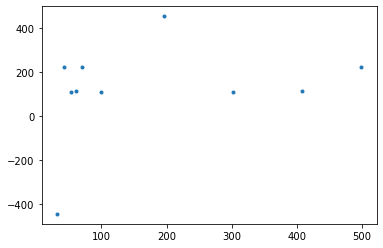

In [60]:
plt.plot(f_A6, Z_A6,'.')
plt.show()

## Fehlerrechnung

In [61]:
u_U = 0.05 * 5 * np.ones(10)
u_R_p =  R_p * 0.01
# print(U_1)
# print(U_2)
# print(Z)
u_z = np.sqrt((U1_A6/U2_A6-1)**2 * u_R_p**2 
                  + R_p**2 * u_U**2 * (U1_A6**2 / U2_A6**2  
                                           + ( U1_A6 /U2_A6-2/U2_A6)**2))
print(u_z)

[3225.09756767 3460.53660293 3421.29334436 3420.05215203 3460.53660293
 3421.29334436 3539.18735128 3421.29334436 3420.05215203 3459.73538996]


## Regression

In [62]:
pop,cov = curve_fit(reg,Z_A6,f_A6,sigma=u_z)
a,b = pop
da_A6, db_A6= np.sqrt(np.diag(cov))
print(f'a = {ufloat(a,da_A6)}')
print(f'b = {ufloat(b,db_A6)}')

a = 0.22+/-0.24
b = (1.5+/-0.6)e+02


### Visualisierung der Regression

In [63]:
ff6 = np.arange(0,551,50)
Z_reg6 = reg(ff6,a,b,)

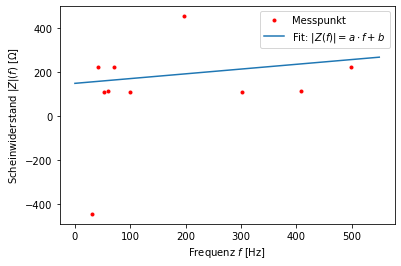

In [64]:
#plt.errorbar(f_A6, Z_A6,fmt='.',yerr=u_z,label='Messpunkt')
plt.plot(f_A6, Z_A6,'r.',label='Messpunkt')
plt.plot(ff6, Z_reg6,label=r'Fit: $|Z(f)| = a \cdot f +b$')
plt.xlabel(r'Frequenz $f$ [Hz]')
plt.ylabel(r'Scheinwiderstand $|Z|(f)$ [$\Omega$]')
plt.legend()
plt.show()

## $\chi^2$

In [65]:
chi_A6 = chi_square(Z_A6,reg(f_A6,a,b),u_z)
chi_A6
print(f'das chi Quadrat ist: {round(chi_A6,2)}')
print(f'das reduzierte chi Quadrat ist: {round(chi_A6-2,2)}')

das chi Quadrat ist: 0.04
das reduzierte chi Quadrat ist: -1.96


## $R^2$

In [66]:
y=Z_A6
x_zunahme=sm.add_constant(f_A6)
results_A6=sm.OLS(y,x_zunahme).fit()#,sigma=yerr
print('''
Lineare Regression
''')
print(results_A6.summary())


Lineare Regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.6891
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.431
Time:                        20:20:49   Log-Likelihood:                -67.486
No. Observations:                  10   AIC:                             139.0
Df Residuals:                       8   BIC:                             139.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.4556    108.15

C:\Users\Ben Fliegener\Miniconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## Resultate von $\chi^2$ und $R^2$

In [67]:
text = [r'$chi^2$', r'$R^2$']
zahlen = [chi_A6-2, 0.079]
df_res = pd.DataFrame({'Name':text, 
                      'Werte': zahlen})
df_res

,Name,Werte
0,$chi^2$,-1.956113
1,$R^2$,0.079000


## Residuen

In [68]:
# für simulierte Daten:
influence_A6 = results_A6.get_influence()

# standardisierte Residuen erhalten
standardized_residuals_A6 = influence_A6.resid_studentized_internal

# standardisierte Residuen anzeigen
print(standardized_residuals_A6)

[-2.45996449  0.70898351  0.16019378  0.15101734  0.64779911  0.0757042
  1.47731699 -0.282577   -0.51511723 -0.12592205]


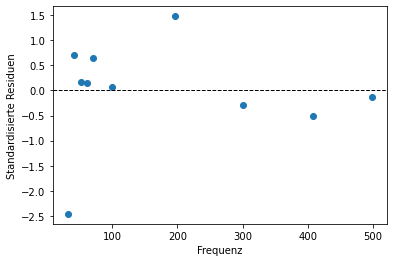

In [69]:
plt.plot(f_A6, standardized_residuals_A6,'o')
plt.xlabel('Frequenz')
plt.ylabel('Standardisierte Residuen')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

## Berechnung der Induktivität aus Regression
$$ |Z| = a\cdot f + b\\ |Z|= 2 \pi L \\ \Rightarrow L = \frac{af+b}{2 \pi f}$$

In [70]:
f_A6
# L_A6 =  reg(f_A6,a,b,)/(2* np.pi f)
L_A6 = a /(2*np.pi) + b/(2*np.pi* f_A6)
L_A6 = round(L_A6.sum(),4)
L_A6

3.397

Berechnung vom Fehler von L
$$\mu_L = \frac{1}{2\pi}\sqrt{u_a^2 + \frac{u_b^2}{f^2}+ \frac{u_f^2}{f^4}} $$

In [71]:
print(len(f_A6))

10


In [72]:
u_a = da_A6 * np.ones(10)
u_b = db_A6 * np.ones(10)
f_err = 0.015
u_f = f_A6 *f_err         # 1.5% + 5 Ziffern
for i in range(len(u_f)):
    u_a[i] = round(u_a[i],4)
    u_b[i] = round(u_b[i],4)
    u_f[i] = round(u_f[i],4)
print(u_f) 
print(u_a) 
print(u_b) 
a_A6 = a*np.ones(10)
b_A6 = b * np.ones(10)

[0.4732 0.6259 0.7875 0.909  1.053  1.4865 2.9496 4.5195 6.1275 7.4835]
[0.2441 0.2441 0.2441 0.2441 0.2441 0.2441 0.2441 0.2441 0.2441 0.2441]
[60.9639 60.9639 60.9639 60.9639 60.9639 60.9639 60.9639 60.9639 60.9639
 60.9639]


In [73]:
u_L = 1 /(2*np.pi) * np.sqrt(u_a**2+ u_b**2/f_A6**2+ u_f**2 /f_A6**4)
u_L = round(u_L.mean(),4)
u_L

0.135

In [74]:
L_err = ufloat(L_A6,u_L)
L_err

3.397+/-0.135

## Phasenverschiebung
$$ \varphi = \frac{t_D}{T_{1/2}} \cdot \pi$$

In [75]:
phi = t_D/T_halb * np.pi

### Fehlerrechnung von $\varphi$

In [76]:
err = np.array([0.25,0.25,0.25,0.1,0.1,0.1,0.025,0.025,0.025,0.025])*1e-3
u_tD = t_D * err
u_T = T_halb * err

phi_err = np.pi * np.sqrt(t_D**2 / T_halb**4 * u_T**2 + u_tD**2 /T_halb**2)
# print(u_tD)
# print(u_T)
# print(phi_err)
# print()
# print(t_D) 
# print(T_halb)
print(f_A6)
print(t_D/T_halb)

[ 31.55  41.73  52.5   60.6   70.2   99.1  196.64 301.3  408.5  498.9 ]
[1.         1.         1.         1.         1.         1.
 1.         1.11111111 1.         1.        ]


### Visualisierung

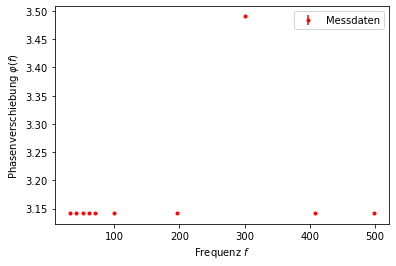

In [77]:
plt.errorbar(f_A6, phi, yerr=phi_err, fmt='r.',label='Messdaten')
plt.xlabel(r'Frequenz $f$')
plt.ylabel(r'Phasenverschiebung $\varphi(f)$')
plt.legend()
plt.show()

### 

# Aufgabe 7

# Aufgabe 8

# Aufgabe 9

In [78]:
A9_df

,Nr Resonanzfreqzenz
1,729.7
2,776.5
3,678.0
4,702.9
5,632.4
6,620.0


In [79]:
f_A9 = A9_df['Nr Resonanzfreqzenz']
f_A9_mean=round(f_A9.mean(),2) 
# Fehlerberechnung:
u_f_A9 = (f_A9 * f_err)**2 # Quadratsumme:
u_f9= round(np.sqrt(u_f_A9.sum()),2)


In [80]:
f9_err = ufloat(f_A9_mean,u_f9)
f9_err

689.92+/-25.43

# Aufgabe 10

In [81]:
A10_df

,Name,Messwert
0,U_G,6.705
1,U_S,55.300
2,U_Pw,0.241
3,U_K,54.800
4,U_SK,6.475


# Aufgabe 11

# Aufgabe 12

In [82]:
A12_df.head()

,Nr,Frequenz,U_2(mV),U_1(V),t_D(ms)
0,1,211.80,36,22.5,1.200
1,2,303.50,52,23.0,0.800
2,3,398.25,84,22.5,0.550
3,4,508.50,150,22.5,0.475
4,5,608.50,315,22.0,0.300


# Aufgabe 13

In [83]:
U1_A12 = np.array(A12_df['U_1(V)'])
U2_A12 = 10 ** (-3) * np.array(A12_df['U_2(mV)'])
f_A12= np.array(A12_df['Frequenz'])
tD_A12 = 10 ** (-3) * np.array(A12_df['t_D(ms)'])

U1_err = 0.25 * np.ones(17)
U2_err = 10 ** (-3) * np.array([0.0005,0.0005,0.001,0.001,0.0025,0.005,0.005,0.0025,0.0025,0.0025,0.0025,0.001,0.001,0.005,0.005,0.005,0.005])
tD_err = 10 ** (-3) * np.array([0.005,0.0025,0.0025,0.0025,0.0025,0.001,0.001,0.001,0.001,0.0005,0.0005,0.0005,0.001,0.001,0.001,0.001])
Z12 = np.zeros(17)
phi12 = np.zeros(17)

for i in range(17):
    Z12[i] = U1_A12[i] / U2_A12[i] - 1
    phi12[i] = 1/2 * tD_A12[i] * f_A12[i]
    
Z12_err = np.array((11.12,6.42,4.36,1.94,0.97,0.45,1.20,2.14,4.35,6.77,8.4,6.01,8.45,0.55,0.13,0.45,0.48))

phi12[i] = 1/2 * tD_A12[i] * f_A12[i]

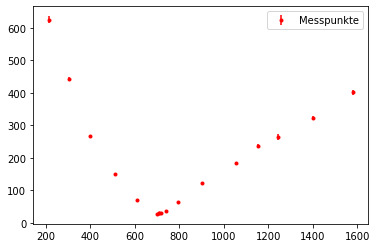

In [84]:
plt.errorbar(f_A12, Z12,fmt='.',color='red',yerr=Z12_err,label='Messpunkte')#yerr=Z12_err,
plt.legend()
plt.show()


In [137]:
# help(curve_fit)


### Regression


In [130]:
pop,cov = curve_fit(reg3,Z12,f_A12,sigma=Z12_err,bounds=(0,[np.inf,1,150e-9]))
a,b,c = pop
da_A12, db_A12, dc_A12 = np.sqrt(np.diag(cov))
print(f'a = {ufloat(a,da_A12)}')
print(f'b = {ufloat(b,db_A12)}')
print(f'c = {ufloat(c,dc_A12)}')

a = (7.350577019524111+/-0)e-06
b = (0+/-7)e+01
c = (1.5+/-0.6)e-07


In [140]:
L = 0.64
u_L = 0.02

C = 1.11e-7 
u_C = 1.3e-9

In [143]:
V12_f = f_A12 #frequenz in Hz

V12_USSI = U1_A12 #SSSpannung in V

V12_USSII = U2_A12
#Unsicherheiten:

V12_U_USSI = np.full_like(V12_f,0.5)
V12_U_USSII = np.full_like(V12_f,0.0005)
R_P = 10e+4
U_R_P = R_P *np.ones(17)
# Fit
#29er Arrays erstellen
R_P_29 = np.full_like(V12_f, R_P)

U_R_P_29 = np.full_like(V12_f, U_R_P)

L_29 = np.full_like(V12_f, L)

C_29 = np.full_like(V12_f, C)

#Komplexer Wds
V12_Z = R_P_29 * (V12_USSI - V12_USSII) / V12_USSII

#Unsicherheit
V12_U_Z = np.sqrt(((V12_USSI - V12_USSII) / V12_USSII * U_R_P_29)**2 + (R_P_29 / V12_USSII * V12_U_USSI)**2 + (R_P_29 * V12_USSI / (V12_USSII**2) * V12_U_USSII)**2)

# Zur ermittlung des Fits wurden die Parameter nacheinander ermittelt
#L festlegen
V12_Z_fit_1 = lambda x, a: np.sqrt((a * x)**2  + (1/(C*np.pi*2 * x))**2 - 2*a/(C*np.pi*2) + R_SP**2)
g11,g11Cov = curve_fit(V12_Z_fit_1, V12_f, V12_Z, sigma=V12_U_Z)

V12_L = g11[0]/(2 * np.pi)
V12_U_L = np.sqrt(g11Cov[0][0])/ (2* np.pi)
print("Induktivität: ", V12_L, "+-", V12_U_L, "H")

#C festlegen
V12_Z_fit_2 = lambda x, a: np.sqrt((g11[0] * x)**2  + (1/(a * x))**2 - 2*g11[0]/a + R_SP**2)
g12,g12Cov = curve_fit(V12_Z_fit_2, V12_f, V12_Z, sigma=V12_U_Z)

V12_C = g12[0]/(2 * np.pi)
V12_U_C = np.sqrt(g12Cov[0][0])/(2 * np.pi)
print("Kapazität : ", V12_C, "+-", V12_U_C)

#R und übrige Param festlegen
V12_Z_fit_3 = lambda x, b, d, e: np.sqrt((g11[0] *x + b - 1/(g12[0] *x + d))**2 + e**2)
g13,g13Cov =curve_fit(V12_Z_fit_3, V12_f, V12_Z, sigma=V12_U_Z)

V12_RSP = g13[2]
V12_U_RSP = np.sqrt(g13Cov[2][2])
print("Spulenwds: ", V12_RSP, "+-", V12_U_RSP)
print("a :", g11[0], "+-", np.sqrt(g11Cov[0][0]))
print("b :", g13[0], "+-", np.sqrt(g13Cov[0][0]))
print("c :", g12[0], "+-", np.sqrt(g12Cov[0][0]))
print("d :", g13[1], "+-", np.sqrt(g13Cov[1][1]))
print("e :", g13[2], "+-", np.sqrt(g13Cov[2][2]))

V12_Z_fit = lambda x, a, b, c, d, e : np.sqrt((a * x + b - 1/(c *x + d))**2 + e**2)

plt.plot(V12_f, V12_Z, "bo")
plt.plot(np.arange(60, 2001, 10), V12_Z_fit(np.arange(60, 2001, 10), g11[0], g13[0], g12[0], g13[1], g13[2]))
plt.errorbar(V12_f, V12_Z, yerr=V12_U_Z, fmt=".")
plt.legend(("Messwerte", "Fit |Z(f)|"))
plt.xlabel("Frequenz in Hz")
plt.ylabel("Scheinwiderstand in Ohm")

NameError: name 'R_SP' is not defined

NameError: name 'out' is not defined

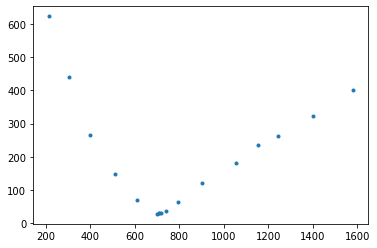

In [87]:
plt.plot(f_A12, Z12, '.')
plt.plot(f_A12, out.best_fit, 'r-')
plt.show()

In [88]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If None, then the
        initi

# Aufgabe 3/4 
Daten von Andre

In [95]:
Frequenz_A3=[1001,2000,3009,4000,5012,6009.6,6999,8000,9005,10001]       #in kHz


Uss_C_A3=[22,22,22,22,22,22,21,21,21,20]                       #in V
Uss_R_A3=[0.15,0.3,0.45,0.6,0.72,0.85,1,1.1,1.25,1.35]         #in V
Phase_A3_tdif=[0.25,0.12,0.08,0.06,0.05,0.025,0.036,0.03,0.028,0.024]    #in ms
phase_T_halbe_a3_mess=[0.45, 0.22, 0.2, 0.1, 0.08, 0.04, 0.065, 0.05, 0.063, 0.055]
Rp = 10* np.ones(len(Uss_C_A3))

In [90]:
U_2= np.array(Uss_R_A3)
U_1 = np.array(Uss_C_A3)
f3 = np.array(Frequenz_A3)
tD3 =  np.array(Phase_A3_tdif)
T_halb3 = np.array(phase_T_halbe_a3_mess)

In [96]:
Z3 = Z_1(U_1,U_2, Rp)
Z3

array([1456.66666667,  723.33333333,  478.88888889,  356.66666667,
        295.55555556,  248.82352941,  200.        ,  180.90909091,
        158.        ,  138.14814815])

## Feblerrechnung

Fehler:  
$U_1 =  3.5\% + 10 \text{Ziffern}$ vom Blatt Technische Daten  
$U_2 = 3.5\% + 10 \text{Ziffern}$ vom Blatt Technische Daten  
$f3 = 1.5\% + 5$ Ziffern vom Blatt Technische Daten  
$t_D$ und $T_{1/2}$ werden jeweils mit $10\%$ abgeschätzt  
$0.8\% + 4$ Ziffern für den ohmschen Widerstand $R_p$ vom Blatt Technische Daten  

In [98]:
u_U1 = 0.25 * np.ones(len(Uss_R_A3))
u_U2 = 0.035 * U_2
u_f3 = f3 * 0.015
u_tD3  = tD3 * 0.1
u_T_halb = T_halb3 * 0.1
u_Rp = Rp* 0.008 
print(u_U2)

[0.00525 0.0105  0.01575 0.021   0.0252  0.02975 0.035   0.0385  0.04375
 0.04725]


### Fehlerrechnung von $|Z|(f)$
$$ u_z = \sqrt{(\partial_R |Z|)^2 u_R^2 + (\partial_{U_1} |Z|)^2 u_{U_1}^2 + (\partial_{U_2} |Z|)^2 u_{U_2}^2} $$

In [99]:
c = Z3**2 * (u_Rp/Rp)**2
d = Rp**2/U_2**2 * (u_U1**2 + u_U2**2 *(U_1/U_2)**2)
u_Z3_v2= np.sqrt(d+c)
u_Z3 = np.sqrt(((U_1-U_2)**2/(U_2**2)*u_Rp**2+R_p**2 *u_U1**2 / U_2**4  
                +  R_p**2 *((U_1-1-U_2)/U_2**2)**2*u_U1**2)) #
                
                  
print(u_Z3_v2)

[55.21493518 27.59905312 18.39379606 13.79119526 11.48991152  9.73012047
  7.9266954   7.20462225  6.3381461   5.61577555]


## Visualisierung

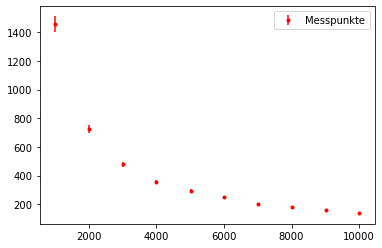

In [100]:
plt.errorbar(f3, Z3,fmt='.',color='red',yerr=u_Z3_v2,label='Messpunkte')#yerr=u_Z3,
plt.legend()
plt.show()

## Regression

In [101]:
#help(curve_fit)

In [102]:
pop3,cov3 = curve_fit(reg2,f3,Z3,sigma=u_Z3_v2)
a3,b3 = pop3
print(cov3)
da3,db3=np.sqrt(np.diag(cov3))
print(f'a = {ufloat(a3,da3)}')
print(f'b = {ufloat(b3,db3)}')

[[ 6.31729319e-17 -1.15289134e-13]
 [-1.15289134e-13  3.77966364e-10]]
a = (7.00+/-0.08)e-07
b = (-1.6+/-1.9)e-05


### Visualisierung

In [103]:
fff = np.arange(900, 11000,100)
Z_fit = reg2(fff,a3,b3)

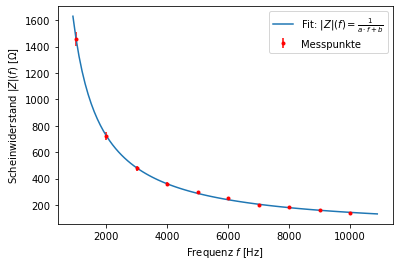

In [104]:
plt.errorbar(f3, Z3,fmt='.',color='red',yerr=u_Z3_v2,label='Messpunkte')
plt.plot(fff,Z_fit,label=r'Fit: $|Z|(f) = \frac{1}{a\cdot f+b}$')
plt.xlabel(r'Frequenz $f$ [Hz]')
plt.ylabel(r'Scheinwiderstand $|Z|(f)$ [$\Omega$]')#  
plt.legend()
plt.show()

## $\chi^2$ 

In [105]:
# reduziertes chi^2
chi3 = chi_square(Z3,reg2(f3,a3,b3),u_Z3_v2)-2
print(chi3)
# test3 = (Z3-reg2(f3,a3,b3))**2/reg2(f3,a3,b3)**2 # Formel aus Das Taschenbuch der Mathematik
# test3 = test3.sum()#-2
# print(test3)

1.034574491032342


## $R^2$

In [106]:
X = sm.add_constant(f3)
model3 = sm.OLS(Z3, X).fit()

# angepasstes R-Quadrat anzeigen
print(model3.rsquared_adj)

0.6117258647200047


## Residuen

In [107]:
# für simulierte Daten:
influence_A3 = model3.get_influence()

# standardisierte Residuen erhalten
standardized_residuals_A3 = influence_A3.resid_studentized_internal

# standardisierte Residuen anzeigen
print(standardized_residuals_A3)

[ 2.67897455 -0.36250461 -0.93739447 -0.97525096 -0.75948711 -0.50345813
 -0.26338123  0.11849741  0.51663641  0.98411127]


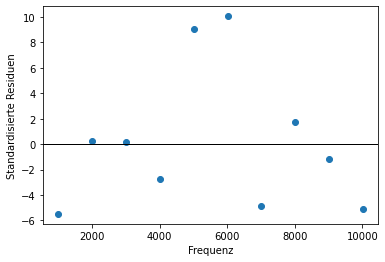

In [108]:
res3 = Z3- reg2(f3,a3,b3)
plt.plot(f3, res3,'o')
plt.xlabel('Frequenz')
plt.ylabel('Standardisierte Residuen')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.show()

# A5/A6

In [109]:
Frequenz_A5=[30,40,50,60,70,80,90,100,200,300,400,500]       #in Hz

Uss_L_A5=[18,19,19,20,20,20,21,21,22,22,22,23]                       #in V
Uss_R_A5=[0.9,0.86,0.8,0.76,0.7,0.66,0.6,0.56,0.32,0.23,0.17,0.14]         #in V
Phase_A5_tdif=[2.5,2,2,2,1.25,1.4,1.4,1.4,1,0.6,0.4,0.38]
Phase_A5_T12=[12.50, 8.30, 8.00, 6.50, 4.20, 3.80, 3.80, 3.70, 2.25, 1.40, 0.90, 0.75]

In [110]:
U_2_5= np.array(Uss_R_A5)
U_1_5 = np.array(Uss_L_A5)
f5 = np.array(Frequenz_A5)
tD5 =  np.array(Phase_A5_tdif)
T_halb5 = np.array(Phase_A5_T12)
Rp =  10* np.ones(len(U_1_5))

In [111]:
Z5 = Z_1(U_1_5,U_2_5,  Rp)
Z5

array([ 190.        ,  210.93023256,  227.5       ,  253.15789474,
        275.71428571,  293.03030303,  340.        ,  365.        ,
        677.5       ,  946.52173913, 1284.11764706, 1632.85714286])

## Fehlerrechnung

In [112]:
u_U15 = 0.04 * U_1_5#0.25 * np.ones(len(U_2_5))
u_U25 = 0.04 * U_2_5
u_f5 = f5 * 0.015
u_tD5  = tD5 * 0.1
u_T_halb5 = T_halb5 * 0.1
u_Rp = Rp* 0.01 
print(u_U25)

[0.036  0.0344 0.032  0.0304 0.028  0.0264 0.024  0.0224 0.0128 0.0092
 0.0068 0.0056]


In [113]:
c = Z5**2 * (u_Rp/Rp)**2
d = Rp**2/U_2_5**2 * (u_U15**2 + u_U25**2 *(U_1_5/U_2_5)**2)
u_Z5= np.sqrt(d+c)

## Visualisierung

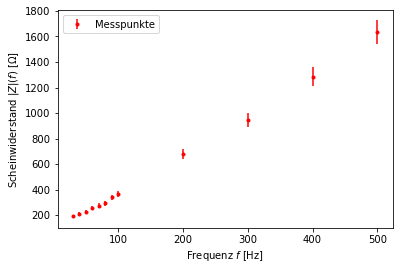

In [114]:
plt.errorbar(f5,Z5,yerr= u_Z5, fmt='.',color='red',label='Messpunkte')
plt.xlabel(r'Frequenz $f$ [Hz]')
plt.ylabel(r'Scheinwiderstand $|Z|(f)$ [$\Omega$]')#  
plt.legend()
plt.show()

## Regression

In [115]:
pop5,cov5 = curve_fit(reg,f5,Z5,sigma=u_Z5)
a5,b5 = pop5
print(cov3)
da5,db5=np.sqrt(np.diag(cov5))
print(f'a = {ufloat(a5,da5)}')
print(f'b = {ufloat(b5,db5)}')

[[ 6.31729319e-17 -1.15289134e-13]
 [-1.15289134e-13  3.77966364e-10]]
a = 2.89+/-0.09
b = 86+/-7


### Plot

In [116]:
ff5 = np.arange(10,550,10)
ZZ5 = reg(ff5,a5,b5)

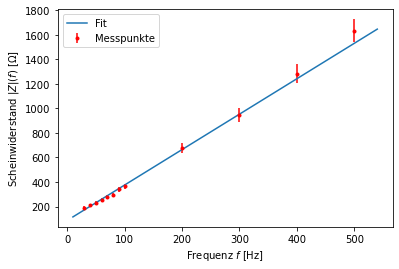

In [117]:
plt.errorbar(f5,Z5,yerr= u_Z5, fmt='.',color='red',label='Messpunkte')
plt.plot(ff5,ZZ5,label='Fit')
plt.xlabel(r'Frequenz $f$ [Hz]')
plt.ylabel(r'Scheinwiderstand $|Z|(f)$ [$\Omega$]')#  
plt.legend()
plt.show()

## $R^2$

In [118]:
X = sm.add_constant(f5)
model5 = sm.OLS(Z5, X).fit()

# angepasstes R-Quadrat anzeigen
R_quad_5= model5.rsquared_adj
print(R_quad_5)

0.997946170982064


## $\chi^2$

In [119]:
chi5 = chi_square(Z5,reg(f5,a5,b5),u_Z5)-2
print(chi5)

5.479596144468922


In [120]:
test= (Z5-reg(f5,a5,b5))**2/u_Z5**2
test = test.sum()
test

7.479596144468922

## Residuen

In [121]:
# für simulierte Daten:
influence_A5 = model5.get_influence()

# standardisierte Residuen erhalten
standardized_residuals_A5 = influence_A5.resid_studentized_internal

# standardisierte Residuen anzeigen
print(standardized_residuals_A5)

[ 1.47939788  0.99364479  0.29889905  0.05562071 -0.33682415 -0.98109593
 -0.18519482 -0.45525588 -0.14095541 -1.99448868 -0.45550219  2.25755814]


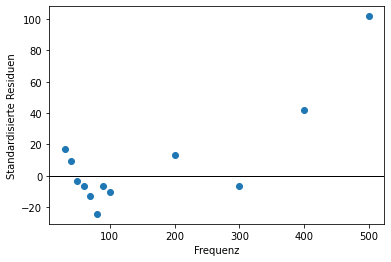

In [122]:
res5 = Z5-reg(f5,a5,b5)
plt.plot(f5, res5,'o')
plt.xlabel('Frequenz')
plt.ylabel('Standardisierte Residuen')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.show()